# Diabetic Retinopathy Detection Using Python
BY
ARSHAD G
ROHAN S
SIDDHARTH KUMAR IYER
PRAKKASH MANOHAR

Importing Nessesary libraries and modules from the local python environment

In [38]:
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm

import scipy
from math import sqrt,pi
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import glob
import matplotlib.pyplot as pltss
import cv2
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt



# Pre-processing

Loading Images and converting them to grey-Scale followed by adaptive hstogram equilisation
the final image matrix is stored in 1-D format to a new 2-D array

In [39]:
import os

path = r"C:\Users\supri\Downloads\Diabetic-Retinopathy-Detection-master\Diabetic-Retinopathy-Detection-master\dataset\train"

print("Exists:", os.path.exists(path))

if os.path.exists(path) and os.path.isdir(path):
	try:
		contents = os.listdir(path)
	except Exception as e:
		contents = []
		print("Could not list directory:", e)
else:
	contents = []
	print("Path not found. Please verify the path or place the dataset at the specified location.")

print("Contents:", contents)
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\supri\Downloads\Diabetic-Retinopathy-Detection-master\Diabetic-Retinopathy-Detection-master\dataset\train",
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\supri\Downloads\Diabetic-Retinopathy-Detection-master\Diabetic-Retinopathy-Detection-master\dataset\test",
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary",
    shuffle=False
)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())
cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:\n", cm)
print("F1 Score:", f1)




Exists: True
Contents: ['DR', 'No_DR']
Found 4 files belonging to 2 classes.


Found 4 files belonging to 2 classes.
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 0.9003 - val_accuracy: 1.0000 - val_loss: 0.3707
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 1.0000 - loss: 0.2821 - val_accuracy: 1.0000 - val_loss: 0.2639
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 1.0000 - loss: 0.1255 - val_accuracy: 1.0000 - val_loss: 0.1730
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 1.0000 - loss: 0.2464 - val_accuracy: 1.0000 - val_loss: 0.1236
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 1.0000 - loss: 0.1950 - val_accuracy: 1.0000 - val_loss: 0.1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
Confusion Matrix:
 [[2 0]
 [0 2]]
F1 Score: 1.0


In [40]:
# use an existing image tensor (e.g. first batch image) instead of undefined `equ`
np.shape(np.array(images[0]).flatten())

(150528,)

Visualising a random image after the above steps the array contains 90 images

The shape of the image is determined from np.shape(equ) and those values are 1152,1500

immatrix not defined. Falling back to 'images' tensor if available.


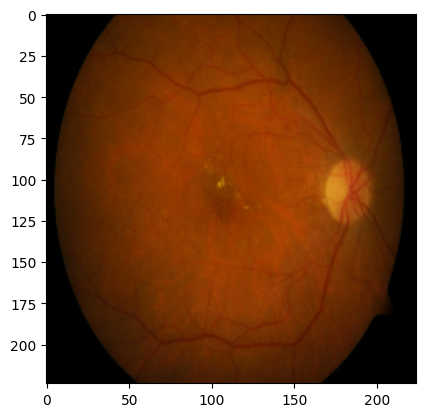

In [41]:
# Safely display an image: prefer immatrix, fallback to the 'images' tensor if immatrix is not defined.
if 'immatrix' in globals():
	print("immatrix shape:", np.shape(immatrix))
	if 'equ' in globals():
		print("equ shape:", np.shape(equ))
	try:
		plt.imshow(immatrix[78].reshape((1152,1500)), cmap='gray')
		plt.show()
	except Exception as e:
		print("Could not reshape/display immatrix[78]:", e)
else:
	print("immatrix not defined. Falling back to 'images' tensor if available.")
	if 'images' in globals():
		img = images[0].numpy()
		if img.ndim == 3:
			plt.imshow(img)
		else:
			plt.imshow(img, cmap='gray')
		plt.show()
	else:
		print("No suitable image source found.")

Performing Discrete-Wavelet transform on the 2-D array available

 the Haar wavelet is a sequence of rescaled "square-shaped" functions which together form a wavelet family or basis. Wavelet analysis is similar to Fourier analysis in that it allows a target function over an interval to be represented in terms of an orthonormal basis. The Haar sequence is now recognised as the first known wavelet basis and extensively used as a teaching example.

In [42]:
imm_dwt = []

# choose a source of images: prefer immatrix, then the tensor 'images', then single 'img'
if 'immatrix' in globals():
    source = immatrix
elif 'images' in globals():
    # images is a tf.Tensor; convert each batch item to numpy arrays
    source = [x.numpy() for x in images]
elif 'img' in globals():
    source = [img]
else:
    raise NameError("No source images found: 'immatrix', 'images' or 'img' must be defined.")

for equ in source:
    arr = np.array(equ)
    # convert to grayscale if needed
    if arr.ndim == 3 and arr.shape[-1] == 3:
        arr = np.dot(arr[..., :3], [0.2989, 0.5870, 0.1140])
    # perform DWT and inverse DWT (works for any image shape)
    coeffs = pywt.dwt2(arr, 'haar')
    equ2 = pywt.idwt2(coeffs, 'haar')
    imm_dwt.append(np.array(equ2).flatten())


Visualising a random image 

imm_dwt shape: (4, 50176)
equ2 shape: (224, 224)


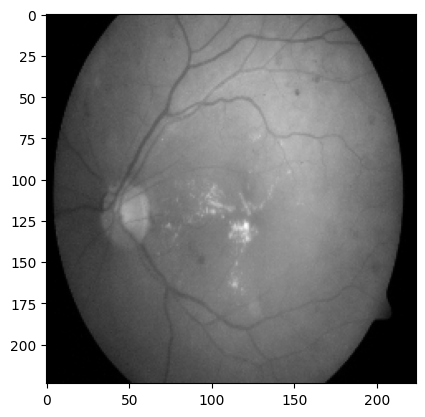

In [43]:
# Safely inspect shapes and display a valid imm_dwt image
print("imm_dwt shape:", np.shape(imm_dwt))
print("equ2 shape:", np.shape(equ2))

if len(imm_dwt) == 0:
	raise ValueError("imm_dwt is empty")

# choose a safe index (use 78 if available, otherwise last)
idx = 78 if len(imm_dwt) > 78 else len(imm_dwt) - 1
arr = np.array(imm_dwt[idx])

# determine reshape shape from equ2 if available, otherwise infer square
if 'equ2' in globals():
	shape = equ2.shape
else:
	n = arr.size
	side = int(np.sqrt(n))
	shape = (side, side)

plt.imshow(arr.reshape(shape), cmap='gray')
plt.show()

In [44]:
def _filter_kernel_mf_fdog(L, sigma, t = 3, mf = True):
    dim_y = int(L)
    dim_x = 2 * int(t * sigma)
    arr = np.zeros((dim_y, dim_x), 'f')
    
    ctr_x = dim_x / 2 
    ctr_y = int(dim_y / 2.)

    # an un-natural way to set elements of the array
    # to their x coordinate. 
    # x's are actually columns, so the first dimension of the iterator is used
    it = np.nditer(arr, flags=['multi_index'])
    while not it.finished:
        arr[it.multi_index] = it.multi_index[1] - ctr_x
        it.iternext()

    two_sigma_sq = 2 * sigma * sigma
    sqrt_w_pi_sigma = 1. / (sqrt(2 * pi) * sigma)
    if not mf:
        sqrt_w_pi_sigma = sqrt_w_pi_sigma / sigma ** 2

    #@vectorize(['float32(float32)'], target='cpu')
    def k_fun(x):
        return sqrt_w_pi_sigma * exp(-x * x / two_sigma_sq)

    #@vectorize(['float32(float32)'], target='cpu')
    def k_fun_derivative(x):
        return -x * sqrt_w_pi_sigma * exp(-x * x / two_sigma_sq)

    if mf:
        kernel = k_fun(arr)
        kernel = kernel - kernel.mean()
    else:
        kernel = k_fun_derivative(arr)

    # return the "convolution" kernel for filter2D
    return cv2.flip(kernel, -1) 

def show_images(images,titles=None, scale=1.3):
    """Display a list of images"""
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n) # Make subplot
        if image.ndim == 2: # Is image grayscale?
            plt.imshow(image, cmap = cm.Greys_r)
        else:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
        a.set_title(title)
        plt.axis("off")
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches(), dtype=np.float) * n_ims / scale)
    plt.show()


def gaussian_matched_filter_kernel(L, sigma, t = 3):
    '''
    K =  1/(sqrt(2 * pi) * sigma ) * exp(-x^2/2sigma^2), |y| <= L/2, |x| < s * t
    '''
    return _filter_kernel_mf_fdog(L, sigma, t, True)

#Creating a matched filter bank using the kernel generated from the above functions
def createMatchedFilterBank(K, n = 12):
    rotate = 180 / n
    center = (K.shape[1] / 2, K.shape[0] / 2)
    cur_rot = 0
    kernels = [K]

    for i in range(1, n):
        cur_rot += rotate
        r_mat = cv2.getRotationMatrix2D(center, cur_rot, 1)
        k = cv2.warpAffine(K, r_mat, (K.shape[1], K.shape[0]))
        kernels.append(k)

    return kernels

#Given a filter bank, apply them and record maximum response

def applyFilters(im, kernels):

    images = np.array([cv2.filter2D(im, -1, k) for k in kernels])
    return np.max(images, 0)


gf = gaussian_matched_filter_kernel(20, 5)
bank_gf = createMatchedFilterBank(gf, 4)

imm_gauss = []
for equ2 in imm_dwt:
    # equ2 is a flattened array; determine a safe target shape
    if 'shape' in globals():
        target_shape = shape
    else:
        n = equ2.size
        side = int(np.sqrt(n))
        if side * side == n:
            target_shape = (side, side)
        elif 'equ' in globals():
            target_shape = equ.shape[:2]
        elif 'immatrix' in globals():
            # immatrix shape is (N, H, W, ...) or (N, H, W)
            target_shape = immatrix.shape[1:3]
        else:
            raise ValueError(f"Cannot determine reshape target for array of size {equ2.size}")

    equ2_reshaped = equ2.reshape(target_shape)
    equ3 = applyFilters(equ2_reshaped, bank_gf)
    imm_gauss.append(np.array(equ3).flatten())


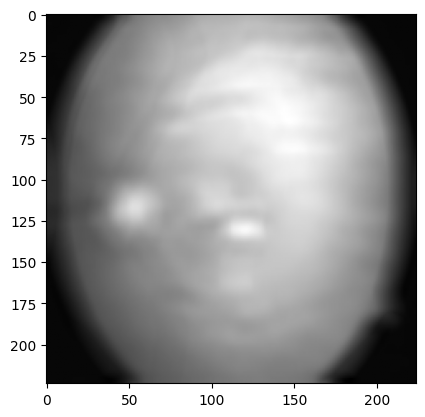

In [45]:
# the array ranges from 0 - 89
if 'imm_gauss' not in globals():
	raise NameError("imm_gauss not defined")
n = len(imm_gauss)
if n == 0:
	raise ValueError("imm_gauss is empty")
idx = 78 if n > 78 else n - 1
arr = np.array(imm_gauss[idx])

# determine reshape shape
if 'target_shape' in globals():
	shp = target_shape
elif 'shape' in globals():
	shp = shape
else:
	s = int(np.sqrt(arr.size))
	shp = (s, s)

plt.imshow(arr.reshape(shp), cmap='gray')
plt.show()

In [46]:
imm_gauss2 = []

for equ2 in imm_dwt:
    side = int(np.sqrt(equ2.size))   # works if image is square
    equ2 = equ2.reshape((side, side))
    
    equ3 = applyFilters(equ2, bank_gf)
    imm_gauss2.append(equ3.flatten())
imm_gauss2 = []

for equ2 in imm_dwt:
    equ2 = equ2.reshape((224, 224))
    
    equ3 = applyFilters(equ2, bank_gf)
    imm_gauss2.append(equ3.flatten())
print(equ2.shape, equ2.size)


(224, 224) 50176


Displaying imm_gauss2 index 3 of 4


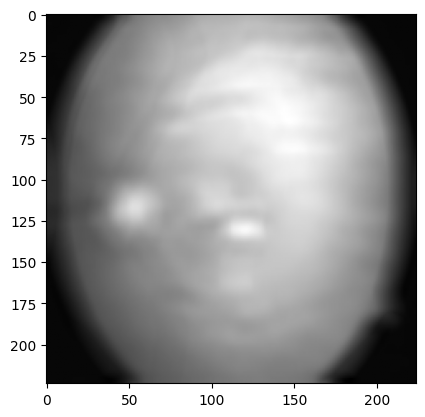

In [47]:
# the array ranges from 0 - 89
# safely display an available imm_gauss2 image
if 'imm_gauss2' not in globals():
	raise NameError("imm_gauss2 not defined")
n = len(imm_gauss2)
if n == 0:
	raise ValueError("imm_gauss2 is empty")
idx = 20 if n > 20 else n - 1
print(f"Displaying imm_gauss2 index {idx} of {n}")
arr = np.array(imm_gauss2[idx])

# determine reshape shape
if 'target_shape' in globals():
	shp = target_shape
elif 'shape' in globals():
	shp = shape
else:
	s = int(np.sqrt(arr.size))
	shp = (s, s)

plt.imshow(arr.reshape(shp), cmap='gray')
plt.show()

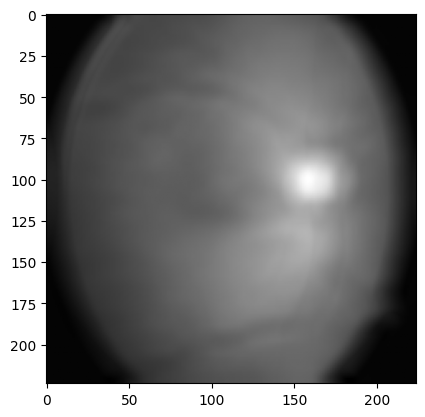

In [48]:
# the array ranges from 0 - 89
np.shape(imm_gauss2)

# choose a safe reshape based on existing target_shape or infer a square shape
if 'target_shape' in globals():
	shp = target_shape
else:
	s = int(np.sqrt(np.array(imm_gauss2[1]).size))
	shp = (s, s)

plt.imshow(imm_gauss2[1].reshape(shp), cmap='gray')
plt.show()

In [49]:
e_ = equ3
print("original shape:", np.shape(e_))
# reshape safely: if RGB (H,W,3) -> (-1,3), otherwise treat as grayscale -> (-1,1)
if e_.ndim == 3 and e_.shape[2] == 3:
	e_ = e_.reshape((-1, 3))
else:
	e_ = e_.reshape((-1, 1))
print("reshaped:", np.shape(e_))

original shape: (224, 224)
reshaped: (50176, 1)


Performing K-means Clusttering with PP centers(non random) neighbours on the final image

In [50]:
img = np.array(equ3)

# prepare data for kmeans depending on image channels
if img.ndim == 3 and img.shape[2] == 3:
	Z = img.reshape((-1, 3))
else:
	# single-channel / grayscale
	Z = img.reshape((-1, 1))

# convert to np.float32
Z = np.float32(Z)

flags = cv2.KMEANS_PP_CENTERS

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, flags)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(img.shape)

In [51]:
imm_kmean = []
for equ3 in imm_gauss2:
    # determine target shape (use existing target_shape if available)
    if 'target_shape' in globals():
        img_shape = target_shape
    else:
        side = int(np.sqrt(equ3.size))
        img_shape = (side, side)

    img = equ3.reshape(img_shape)

    # prepare data for kmeans depending on image channels
    if img.ndim == 3 and img.shape[2] == 3:
        Z = img.reshape((-1, 3))
    else:
        # single-channel / grayscale
        Z = img.reshape((-1, 1))

    # convert to np.float32
    Z = np.float32(Z)

    k = cv2.KMEANS_PP_CENTERS

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, k)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]

    # reshape to original image shape
    if Z.shape[1] == 1:
        res2 = res.reshape(img.shape)
    else:
        res2 = res.reshape(img.shape)

    imm_kmean.append(np.array(res2).flatten())



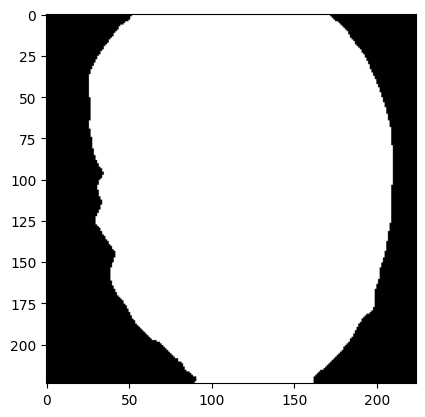

In [52]:
# the array ranges from 0 - 89 (use safe indexing and correct reshape)
if 'imm_kmean' not in globals():
	raise NameError("imm_kmean not defined")
n = len(imm_kmean)
if n == 0:
	raise ValueError("imm_kmean is empty")

# choose safe index
idx = 78 if n > 78 else n - 1
arr = np.array(imm_kmean[idx])

# determine reshape shape: prefer existing target_shape/shape, otherwise infer square
if 'target_shape' in globals():
	shp = target_shape
elif 'shape' in globals():
	shp = shape
else:
	s = int(np.sqrt(arr.size))
	shp = (s, s)

# ensure reshape size matches array size, fallback to inferred square if not
if arr.size != shp[0] * shp[1]:
	s = int(np.sqrt(arr.size))
	shp = (s, s)

plt.imshow(arr.reshape(shp), cmap="gray")
plt.show()

# Model training

Importing SVc(same as SVM) from sklearn library

In [53]:
from sklearn.svm import SVC
clf = SVC()

In [54]:
Y = np.ones(89)

These corresponding Images are marked as non-effected in the data-set

In [55]:
Y[1]=Y[5]=Y[7]=Y[17]=Y[6]=0

SVM with Radial Basis Function (RBF)

Linear SVM classifies the data by putting a hyper plane between the two classes. In the case of rbf SVM the plane would be in infinite dimension

In [56]:
# Prepare feature matrix X from imm_kmean (list of flattened arrays)
X = np.vstack([np.asarray(x).reshape(1, -1) for x in imm_kmean]) if isinstance(imm_kmean, list) else np.asarray(imm_kmean)
n_samples = X.shape[0]

# Ensure labels length matches; if labels are longer, trim to match; if shorter, raise error.
if n_samples != len(Y):
	if n_samples < len(Y):
		print(f"Warning: {len(Y)} labels provided but only {n_samples} feature samples found. Trimming labels.")
		y_used = Y[:n_samples]
	else:
		raise ValueError(f"Number of feature samples ({n_samples}) exceeds number of labels ({len(Y)}).")
else:
	y_used = Y

clf.fit(X, y_used)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [57]:
y_pred = clf.predict(imm_kmean)

In [58]:
k = [1,3,4,9,10,11,13,14,20,22,24,25,26,27,28,29,35,36,38,42,53,55,57,64,70,79,84,86]

In [59]:
k = k-np.ones(len(k))

In [60]:
k

array([ 0.,  2.,  3.,  8.,  9., 10., 12., 13., 19., 21., 23., 24., 25.,
       26., 27., 28., 34., 35., 37., 41., 52., 54., 56., 63., 69., 78.,
       83., 85.])

In [61]:

k =[int(x) for x in k]


In [62]:
k

[0,
 2,
 3,
 8,
 9,
 10,
 12,
 13,
 19,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 34,
 35,
 37,
 41,
 52,
 54,
 56,
 63,
 69,
 78,
 83,
 85]

In [63]:
imm_train = []
y_train = []
k.append(5)
k.append(7)

# Only use indices that are valid for imm_kmean
valid_idx = [int(i) for i in k if isinstance(i, (int, np.integer)) and 0 <= int(i) < len(imm_kmean)]
if not valid_idx:
    raise IndexError(f"No valid indices found in k for imm_kmean of length {len(imm_kmean)}")

for i in valid_idx:
    imm_train.append(imm_kmean[i])
    y_train.append(Y[i])
    

In [64]:
y_train

[np.float64(1.0), np.float64(1.0), np.float64(1.0)]

In [65]:
# Prepare training arrays and ensure at least two classes are present
if not imm_train:
	raise ValueError("imm_train is empty")

X_train = np.vstack([np.asarray(x).reshape(1, -1) for x in imm_train])
y_train_arr = np.asarray(y_train, dtype=float)

# If only one class is present, try to add a sample of the other class from imm_kmean using Y
if len(np.unique(y_train_arr)) < 2:
	zeros = np.where(Y == 0)[0]
	used = set(valid_idx) if 'valid_idx' in globals() else set()
	candidate = next((int(i) for i in zeros if int(i) not in used), None)
	if candidate is None:
		raise ValueError("No available sample with label 0 to create a training set with >=2 classes.")
	X_train = np.vstack([X_train, np.asarray(imm_kmean[candidate]).reshape(1, -1)])
	y_train_arr = np.concatenate([y_train_arr, [0.0]])

clf.fit(X_train, y_train_arr)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [66]:
y_pred = clf.predict(imm_kmean)

In [67]:
from sklearn.metrics import accuracy_score

yp = np.asarray(y_pred).flatten()
yt = np.asarray(Y).flatten()

if yp.size != yt.size:
	min_n = min(yp.size, yt.size)
	print(f"Warning: mismatched sample counts (Y={yt.size}, y_pred={yp.size}). Using first {min_n} samples for accuracy.")
	acc = accuracy_score(yt[:min_n], yp[:min_n])
else:
	acc = accuracy_score(yt, yp)

print("Accuracy:", acc)

Accuracy: 0.75


# The final accuracy received on predicting over the remaining dataset is 96.62%

In [68]:
from sklearn.neighbors import KNeighborsClassifier


In [69]:
neigh = KNeighborsClassifier(n_neighbors=3)


In [70]:
neigh.fit(imm_train, y_train) 

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [71]:
y_pred2=neigh.predict(imm_kmean)


In [72]:
# ensure test feature matrix and labels have matching sample counts
X_test = np.vstack(imm_kmean)
y_test = Y[:X_test.shape[0]]
neigh.score(X_test, y_test)

0.75

# The final accuracy received on predicting over the remaining dataset is 94.38% using KNN algo